In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
ds = pd.read_csv('Movies.csv', encoding='ISO-8859-1')
ds.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
ds.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
# Filtering and Preprocessing

In [7]:
attribute=ds.columns
print(attribute)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [8]:
ds.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:

shape=ds.shape
print(f"Number of rows:{shape[0]},Number of columns:{shape[1]}")

Number of rows:15509,Number of columns:10


In [10]:
unique_genres=ds['Genre'].unique()
print("Unique Genres:",unique_genres)

Unique Genres: ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family,

In [11]:
rating_dist=ds['Rating'].value_counts()
print("Rating Distribution:\n",rating_dist)

Rating Distribution:
 Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64


In [12]:
ds.drop_duplicates(inplace=True)

In [13]:
attributes=['Name','Year','Duration','Votes','Rating']
ds.dropna(subset=attributes,inplace=True)
missing_val=ds.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [14]:
movie_name_rating=ds[['Name','Rating']]
print(movie_name_rating.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


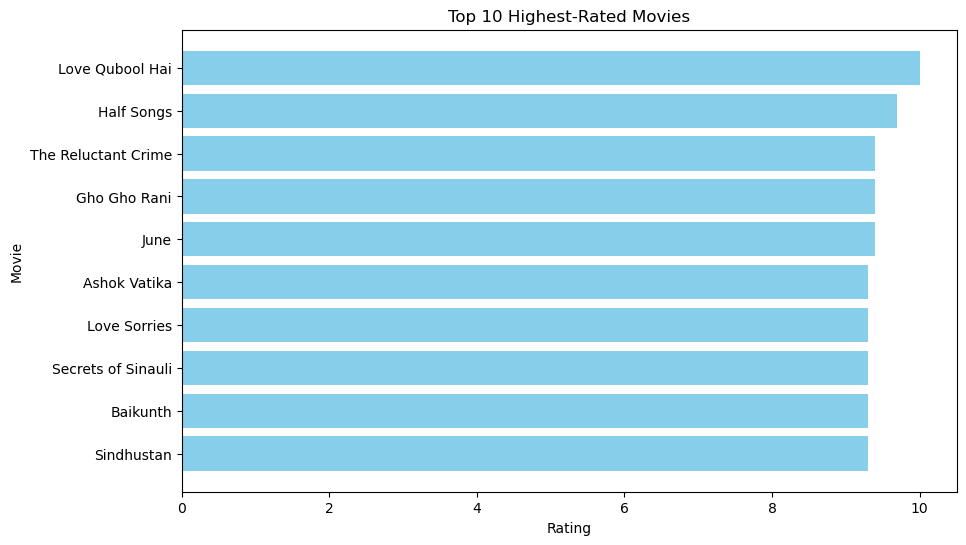

In [15]:
top_rated_movies=ds.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'],top_rated_movies['Rating'],color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest-Rated Movies')
plt.gca().invert_yaxis()
plt.show()

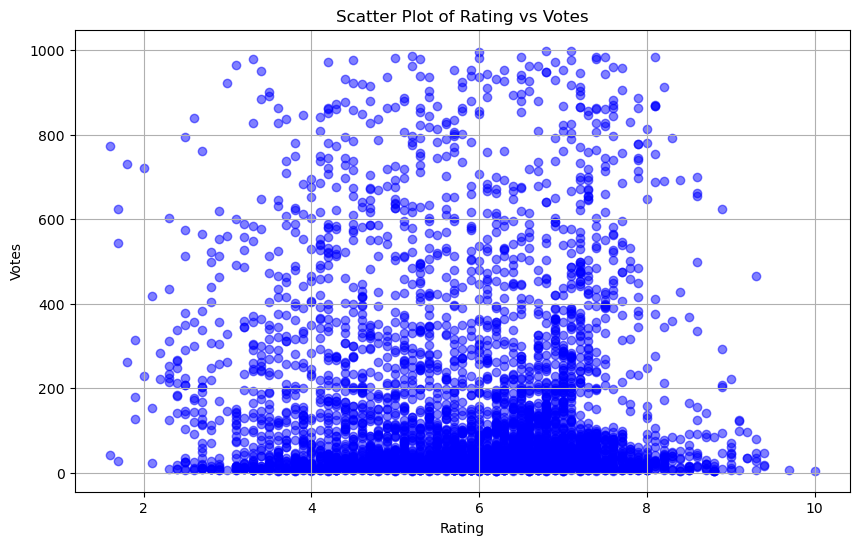

In [16]:
ds['Votes']=pd.to_numeric(ds['Votes'],errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(ds['Rating'],ds['Votes'],alpha=0.5,color='b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs Votes')
plt.grid(True)
plt.show()

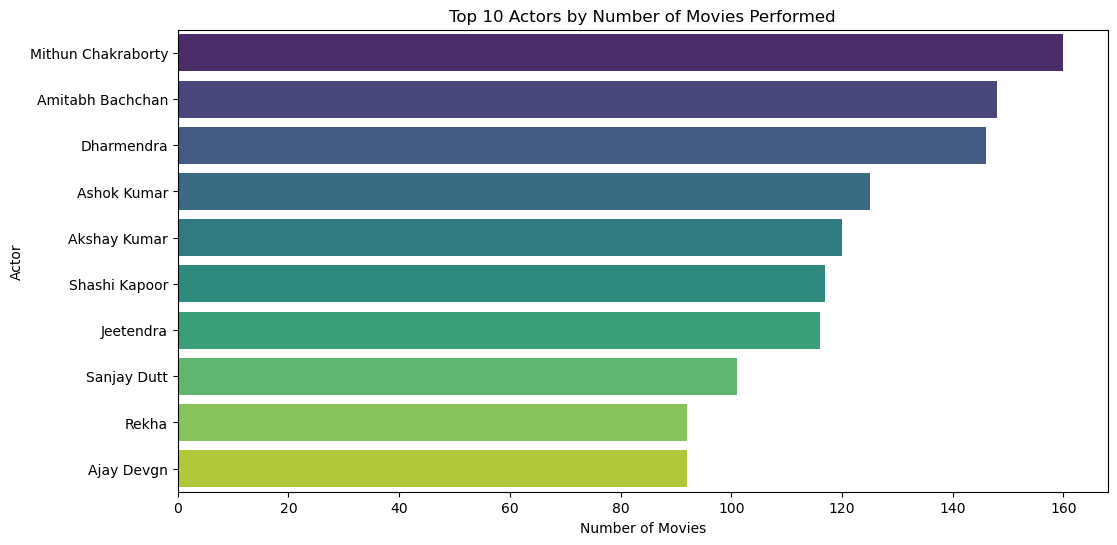

In [17]:
actors=pd.concat([ds['Actor 1'],ds['Actor 2'],ds['Actor 3']])
actor_counts=actors.value_counts().reset_index()
actor_counts.columns=['Actor','Number of Movies']
plt.figure(figsize=(12,6))
sns.barplot(x='Number of Movies', y='Actor',data=actor_counts.head(10),palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

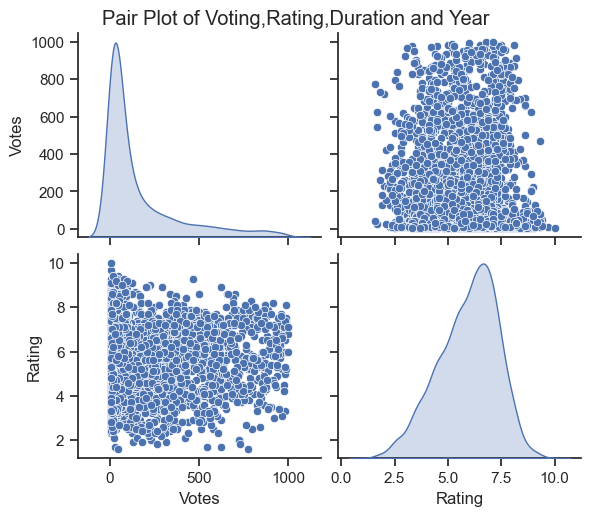

In [18]:
columns_of_interest=['Votes','Rating','Duration','Year']
sns.set(style='ticks')
sns.pairplot(ds[columns_of_interest],diag_kind='kde',markers='o',palette='viridis',height=2.5,aspect=1.2)
plt.suptitle('Pair Plot of Voting,Rating,Duration and Year',y=1.02)
plt.show()

object


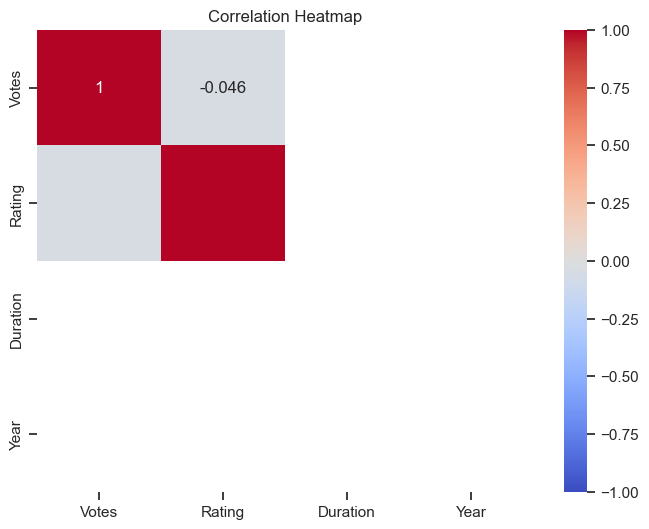

In [19]:
print(ds['Duration'].dtype)
ds['Duration'] = pd.to_numeric(ds['Duration'], errors='coerce')
ds['Year'] = pd.to_numeric(ds['Year'], errors='coerce')
numerical_columns=['Votes','Rating','Duration','Year']
correlation_matrix=ds[numerical_columns].corr()
plt.figure(figsize= (8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin= -1,vmax= 1)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Selecting Feature
ds_sorted=ds.sort_values(by='Votes',ascending=False)
ds_sorted['Vote_Count_Percentile']=ds_sorted['Votes'].rank(pct=True)*100
ds_sorted.reset_index(drop=True,inplace=True)
print(ds_sorted[['Name','Votes','Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977689
2                              Kurukshetra  996.0              99.955377
3                              Dishkiyaoon  986.0              99.933066
4                               Kadvi Hawa  985.0              99.899598
...                                    ...    ...                    ...
5846                                 Ziddi    NaN                    NaN
5847                        Zila Ghaziabad    NaN                    NaN
5848                                 Zinda    NaN                    NaN
5849              Zindagi Na Milegi Dobara    NaN                    NaN
5850                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [21]:
ds=ds.dropna(subset=['Votes'])
ds.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),NaN,NaN,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,NaN,NaN,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,NaN,NaN,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,NaN,NaN,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,NaN,NaN,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [22]:
# Model Training and Testing
ds['Year'] = pd.to_numeric(ds['Year'], errors='coerce')
ds['Duration'] = pd.to_numeric(ds['Duration'], errors='coerce')

# Specify the numerical columns for input
numerical_columns = ['Year', 'Duration', 'Votes']

# Separate features (X) and target variable (y)
X = ds[numerical_columns]
y = ds['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SimpleImputer to fill missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [23]:
model=LinearRegression()
model.fit(X_train_imputed, y_train)


LinearRegression()

In [24]:
X_test_imputed = imputer.transform(X_test)

#Predict using the trained model
y_pred = model.predict(X_test_imputed)

In [25]:
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error:{mae}")
print(f"Root Mean Squared Error:{rmse}")
print(f"R-squared(R2)Score:{r2}")

Mean Absolute Error:1.1742713267590301
Root Mean Squared Error:1.4254420771171321
R-squared(R2)Score:-0.007848022685870815


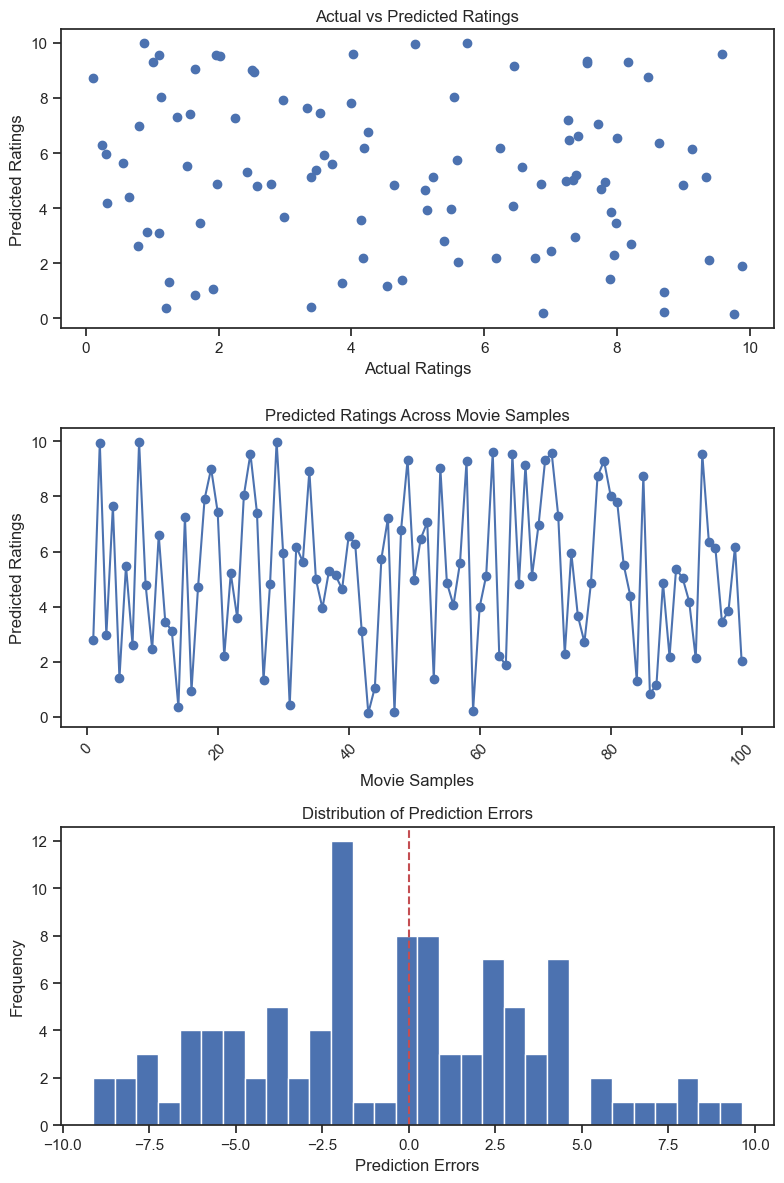

In [26]:
# Visualization
y_test=np.random.rand(100)*10
y_pred=np.random.rand(100)*10
errors=y_test-y_pred
fig,axs=plt.subplots(3,1,figsize=(8,12))
axs[0].scatter(y_test,y_pred)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs Predicted Ratings")

#Line plot
movie_samples=np.arange(1,len(y_pred)+1)
axs[1].plot(movie_samples,y_pred,marker='o',linestyle='-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Samples")
axs[1].tick_params(axis='x',rotation=45)

#Histogram
axs[2].hist(errors,bins=30)
axs[2].set_xlabel("Prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x=0,color='r',linestyle='--')
plt.tight_layout()
plt.show()